In [79]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

time format code list:https://docs.python.org/2/library/datetime.html

In [166]:
date_rng = pd.date_range(start='1/1/2018', end='2/08/2018', freq='H')
date_rng
type(date_rng[0])
pd.date_range('1998-03-10', '1998-03-15', freq='D')
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-02-07 15:00:00', '2018-02-07 16:00:00',
               '2018-02-07 17:00:00', '2018-02-07 18:00:00',
               '2018-02-07 19:00:00', '2018-02-07 20:00:00',
               '2018-02-07 21:00:00', '2018-02-07 22:00:00',
               '2018-02-07 23:00:00', '2018-02-08 00:00:00'],
              dtype='datetime64[ns]', length=913, freq='H')

pandas._libs.tslibs.timestamps.Timestamp

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [168]:
df = pd.DataFrame(date_rng, columns=['date'])
df['num_counnt'] = np.random.randint(0,100,size=(len(date_rng)))
df.set_index('date', inplace=True)
df.head(2)
df.dtypes

,num_counnt
date,
2018-01-01 00:00:00,55
2018-01-01 01:00:00,88


num_counnt    int64
dtype: object

In [175]:
df.asfreq('T').head() # T means minute

,num_counnt
date,
2018-01-01 00:00:00,55.0
2018-01-01 00:01:00,NaN
2018-01-01 00:02:00,NaN
2018-01-01 00:03:00,NaN
2018-01-01 00:04:00,NaN


In [99]:
# pd.to_datetime convert string to datetimeIndex
string_date_rng = [str(x) for x in date_rng]
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)
timestamp_date_rng

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-01-07 15:00:00', '2018-01-07 16:00:00',
               '2018-01-07 17:00:00', '2018-01-07 18:00:00',
               '2018-01-07 19:00:00', '2018-01-07 20:00:00',
               '2018-01-07 21:00:00', '2018-01-07 22:00:00',
               '2018-01-07 23:00:00', '2018-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [110]:
string_date_rng_2 = ['June-01-2018', 'June-02-2018', 'June-03-2018']
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]
timestamp_date_rng_2
# string_date_rng_2
# pd.to_datetime(string_date_rng_2)

df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])
df2

[datetime.datetime(2018, 6, 1, 0, 0),
 datetime.datetime(2018, 6, 2, 0, 0),
 datetime.datetime(2018, 6, 3, 0, 0)]

,date
0,2018-06-01
1,2018-06-02
2,2018-06-03


In [125]:
df.head(2)
df[df.index.month == 2].head(3)
df[df.index.day == 2].head(2)

df['2018-01-03'].head(2)
df['2018-02'].head(2)
df['2018-01-04':'2018-01-06'].head(2)

,num_counnt
date,
2018-01-01 00:00:00,40
2018-01-01 01:00:00,74


,num_counnt
date,
2018-02-01 00:00:00,85
2018-02-01 01:00:00,29
2018-02-01 02:00:00,23


,num_counnt
date,
2018-01-02 00:00:00,2
2018-01-02 01:00:00,3


,num_counnt
date,
2018-01-03 00:00:00,31
2018-01-03 01:00:00,61


,num_counnt
date,
2018-02-01 00:00:00,85
2018-02-01 01:00:00,29


,num_counnt
date,
2018-01-04 00:00:00,80
2018-01-04 01:00:00,38


In [129]:
df.resample('D').mean().head(2)
df.resample('M').sum().head(2)

df['rolling_sum'] = df.rolling(3).sum()
df.head(4)

,num_counnt
date,
2018-01-01,47.291667
2018-01-02,42.041667


,num_counnt
date,
2018-01-31,36826
2018-02-28,8258


,num_counnt,rolling_sum
date,,
2018-01-01 00:00:00,40,NaN
2018-01-01 01:00:00,74,NaN
2018-01-01 02:00:00,30,144.0
2018-01-01 03:00:00,66,170.0


In [130]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df.head(4)


,num_counnt,rolling_sum,rolling_sum_backfilled
date,,,
2018-01-01 00:00:00,40,NaN,144.0
2018-01-01 01:00:00,74,NaN,144.0
2018-01-01 02:00:00,30,144.0,144.0
2018-01-01 03:00:00,66,170.0,170.0


When working with time series data, you may come across time values that are in Unix time. Unix time, also called Epoch time is the number of seconds that have elapsed since 00:00:00 Coordinated Universal Time (UTC), Thursday, 1 January 1970. Using Unix time helps to disambiguate time stamps so that we don’t get confused by time zones, daylight savings time, etc.

In [131]:
epoch_t = 1529272655
real_t = pd.to_datetime(epoch_t, unit='s')
real_t

Timestamp('2018-06-17 21:57:35')

In [23]:
# If I wanted to convert that time that is in UTC to my own time zone,
# this part is still not clear?
real_t.tz_localize('UTC').tz_convert('US/Pacific')

Timestamp('2018-06-17 14:57:35-0700', tz='US/Pacific')

In [139]:
pd.to_datetime('7/8/1952', dayfirst=True)
pd.to_datetime('2018-01-15 3:45pm')
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

Timestamp('1952-08-07 00:00:00')

Timestamp('2018-01-15 15:45:00')

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [140]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/notebook/opsd_germany_daily.csv'
opsd_daily = pd.read_csv(f)
opsd_daily.shape
opsd_daily.head(2)

(4383, 5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


In [142]:
# format Y means 4 digits for the year
opsd_daily['Date'] = pd.to_datetime(opsd_daily.Date, format='%Y-%m-%d')

In [147]:
# preferred way to read in a time series dataframe
opsd_daily = pd.read_csv(f, index_col=0, parse_dates=True)

In [148]:
opsd_daily.dtypes
opsd_daily.index

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [149]:
opsd_daily.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [150]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [151]:
# partial string indexing
opsd_daily.loc['2012-02'].head()


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday


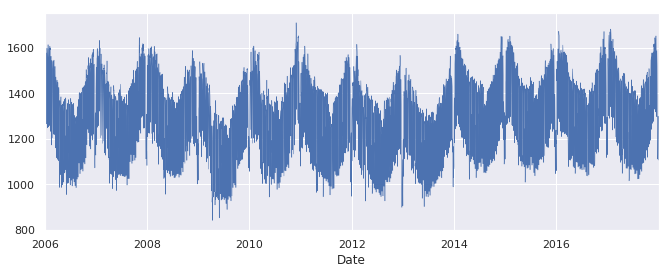

In [152]:
opsd_daily['Consumption'].plot(linewidth=0.5);

Text(0,0.5,'Daily Totals (GWh)')

Text(0,0.5,'Daily Totals (GWh)')

Text(0,0.5,'Daily Totals (GWh)')

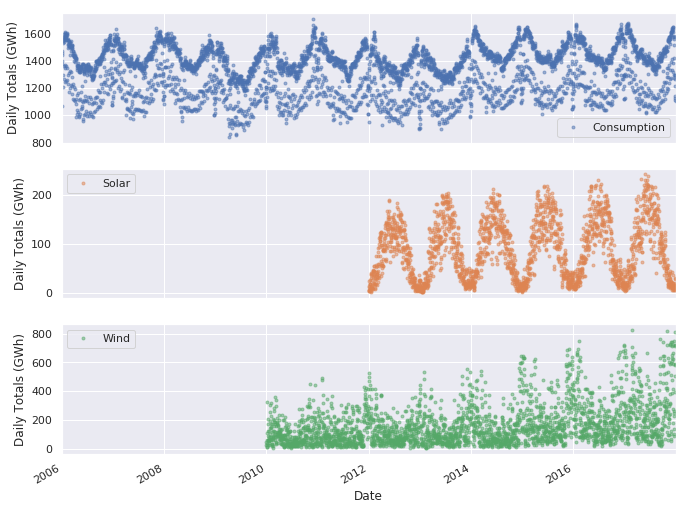

In [154]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

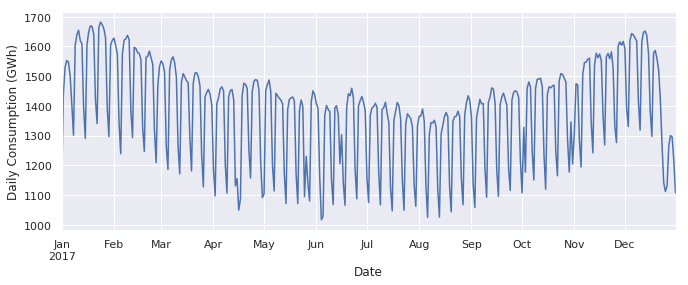

In [155]:
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

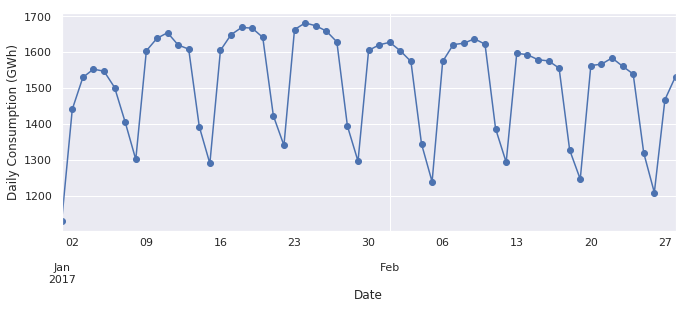

In [156]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

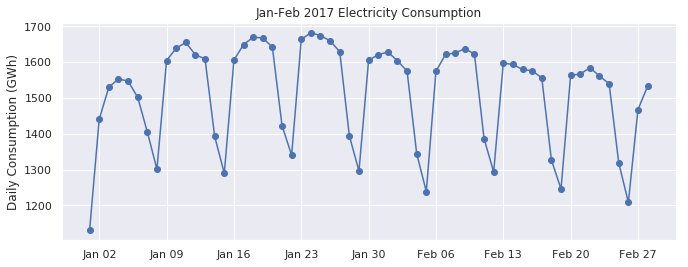

In [163]:
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### seasonality

In [165]:
opsd_daily.head(2)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday


Text(0,0.5,'GWh')

Text(0.5,1,'Consumption')

Text(0,0.5,'GWh')

Text(0.5,1,'Solar')

Text(0,0.5,'GWh')

Text(0.5,1,'Wind')

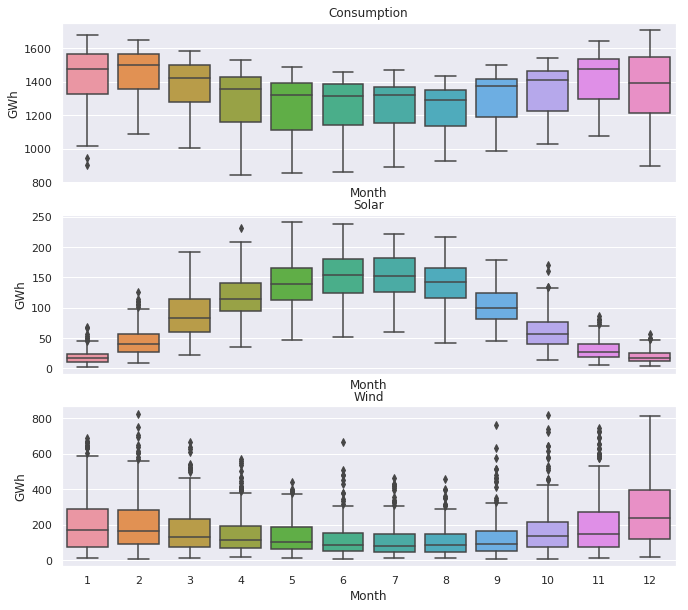

In [164]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

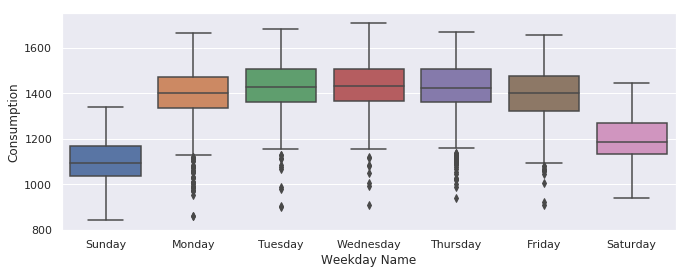

In [76]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

In [167]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq


,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


### resampling

In [81]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


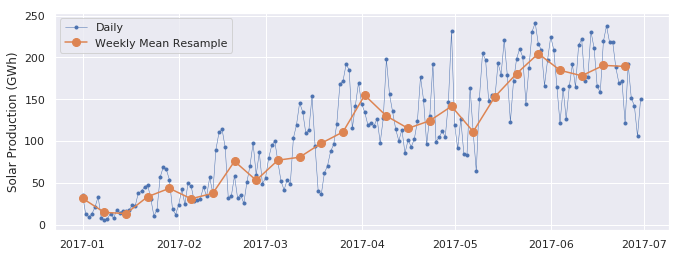

In [176]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [177]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


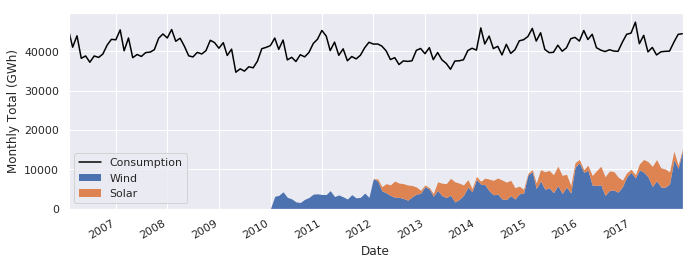

In [178]:
fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

In [85]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


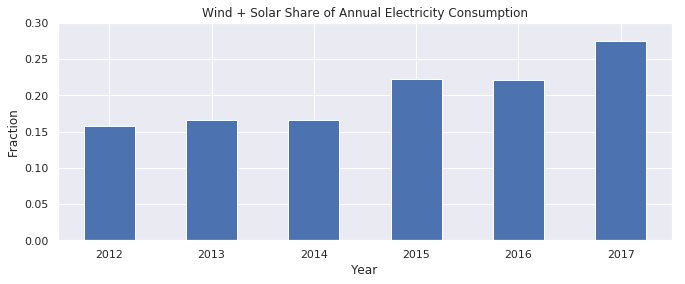

In [86]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0);


### rolling windows

In [87]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


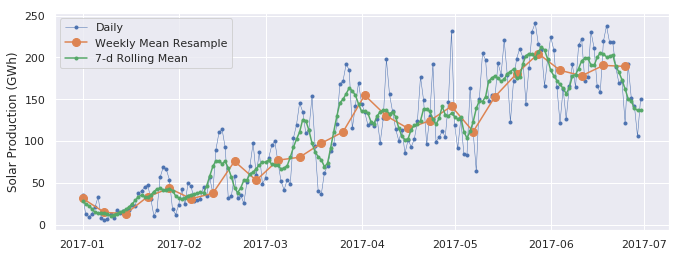

In [179]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'],marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [89]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

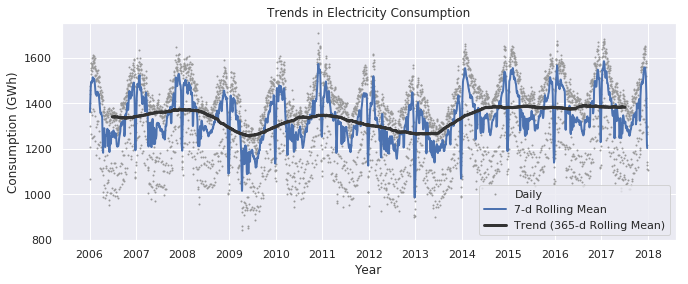

In [90]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

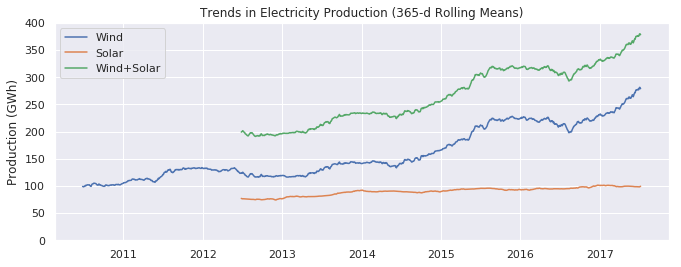

In [181]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    _ = ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    _ = ax.xaxis.set_major_locator(mdates.YearLocator())
    _ = ax.set_ylim(0, 400)
    _ = ax.legend()
    _ = ax.set_ylabel('Production (GWh)')
    _ = ax.set_title('Trends in Electricity Production (365-d Rolling Means)');